# 
### Feature Selection Techniques in Machine Learning

In this project implements two different supervised learning models: 1) linear regression (using gradient descent), and 2) k-nearest neighbor classification. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import random as rand
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from collections import Counter
data_names = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label']
data = pd.read_csv('iris.data', 
                   names = data_names)

/Users/mona/opt/anaconda3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Linear Regression 
The first model we will implement is Linear Regression using Gradient Descent. 

###  Getting data
In order to properly test linear regression, we first need to find a set of correlated variables, so that we use one to predict the other. Consider the following scatterplots:

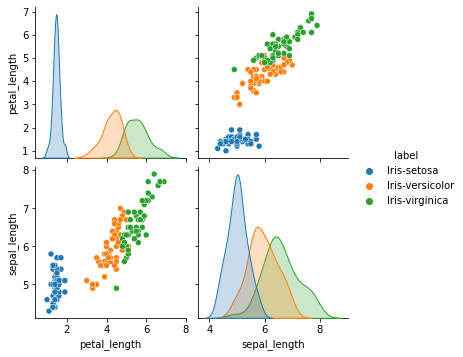

In [2]:
sb.pairplot(data[['petal_length','sepal_length','label']], hue = 'label')

We observe that sepal length and petal width for Iris-versicolor and Iris-virginica are reasonably correlated, so we are going to take those two variables for those two classes and use one to regress on the other.

In [3]:
sub_data = data.loc[data['label'] != 'Iris-setosa', :]
y = sub_data['petal_length'].values
x = sub_data['sepal_length'].values
#print(x)
x = x.reshape(-1, 1)
print(x)
print(y)

[[7. ]
 [6.4]
 [6.9]
 [5.5]
 [6.5]
 [5.7]
 [6.3]
 [4.9]
 [6.6]
 [5.2]
 [5. ]
 [5.9]
 [6. ]
 [6.1]
 [5.6]
 [6.7]
 [5.6]
 [5.8]
 [6.2]
 [5.6]
 [5.9]
 [6.1]
 [6.3]
 [6.1]
 [6.4]
 [6.6]
 [6.8]
 [6.7]
 [6. ]
 [5.7]
 [5.5]
 [5.5]
 [5.8]
 [6. ]
 [5.4]
 [6. ]
 [6.7]
 [6.3]
 [5.6]
 [5.5]
 [5.5]
 [6.1]
 [5.8]
 [5. ]
 [5.6]
 [5.7]
 [5.7]
 [6.2]
 [5.1]
 [5.7]
 [6.3]
 [5.8]
 [7.1]
 [6.3]
 [6.5]
 [7.6]
 [4.9]
 [7.3]
 [6.7]
 [7.2]
 [6.5]
 [6.4]
 [6.8]
 [5.7]
 [5.8]
 [6.4]
 [6.5]
 [7.7]
 [7.7]
 [6. ]
 [6.9]
 [5.6]
 [7.7]
 [6.3]
 [6.7]
 [7.2]
 [6.2]
 [6.1]
 [6.4]
 [7.2]
 [7.4]
 [7.9]
 [6.4]
 [6.3]
 [6.1]
 [7.7]
 [6.3]
 [6.4]
 [6. ]
 [6.9]
 [6.7]
 [6.9]
 [5.8]
 [6.8]
 [6.7]
 [6.7]
 [6.3]
 [6.5]
 [6.2]
 [5.9]]
[4.7 4.5 4.9 4.  4.6 4.5 4.7 3.3 4.6 3.9 3.5 4.2 4.  4.7 3.6 4.4 4.5 4.1
 4.5 3.9 4.8 4.  4.9 4.7 4.3 4.4 4.8 5.  4.5 3.5 3.8 3.7 3.9 5.1 4.5 4.5
 4.7 4.4 4.1 4.  4.4 4.6 4.  3.3 4.2 4.2 4.2 4.3 3.  4.1 6.  5.1 5.9 5.6
 5.8 6.6 4.5 6.3 5.8 6.1 5.1 5.3 5.5 5.  5.1 5.3 5.5 6.7 6.9 5.  5.7 4.9
 6.7 4.

### Gradient descent for linear regression 

Gradient descent is an iterative algorithm; it keeps updating the variables until a convergence criterion is met. In our case, our convergence criterion is whichever of the following two criteria happens first:

- The maximum number of iterations is met
- The relative improvement in the cost is not greater than the tolerance we have specified.

In [4]:

def compute_cost(x, theta, y):
    m = len(y)  # Number of training examples
    y_pred = np.dot(x, theta)
    error = y_pred - y
    return np.sum(error ** 2) / (2 * m), error
    
    return cost
def linear_regression_gd(x, y, learning_rate=0.00001, max_iter=10000, tol=1e-5):
    m = len(y)
    x = np.c_[np.ones((m, 1)), x]  # Add intercept term `m` rows and 1 column then concat with x
    #print(x)
    
    #theta = np.random.rand(x.shape[1])  # Initialize theta with random values
    theta= np.zeros(x.shape[1]) # Initialize theta with 0
    #print(theta)
    all_cost = np.zeros(max_iter)
    #print(all_cost)
    
    for i in range(max_iter):
        all_cost[i],error = compute_cost(x, theta, y)
        gradient = np.dot(x.T, error) / m
        # if i==0:
        #     print ( theta, gradient)
        theta = theta - learning_rate * gradient
        if i==0:
            print ( theta, gradient)
        
        if np.linalg.norm(gradient) < tol:
            break
    
    return theta, all_cost[:i+1], i





### Convergence plots 
The learning rate plays a big role in how fast our algorithm converges: testing two different values for the learning rate:
- 0.00001
- 0.000001

while keeping the default values for the max number of iterations and the tolerance.

- Plot the two convergence plots (cost vs. iterations) 

- Observation


[4.90600e-05 3.11702e-04] [ -4.906  -31.1702]


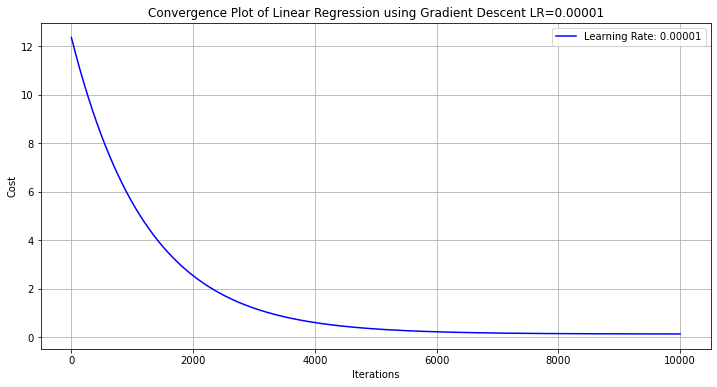

[4.90600e-06 3.11702e-05] [ -4.906  -31.1702]


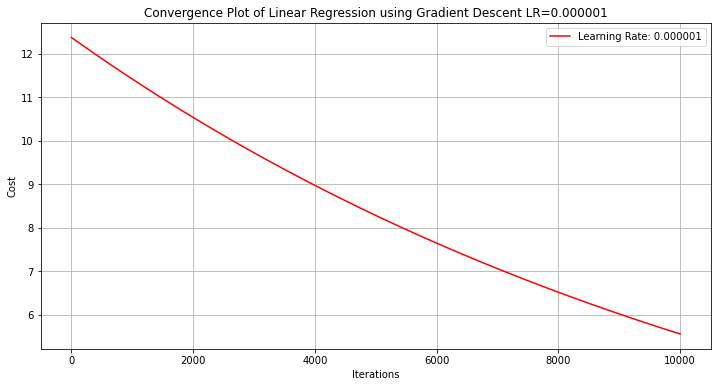

In [5]:

plt.figure(figsize=(12, 6))
theta_1, all_cost_1, iters_1 = linear_regression_gd(x, y, 0.00001)
plt.plot(range(iters_1 + 1), all_cost_1, color='b', label=f'Learning Rate: 0.00001')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot of Linear Regression using Gradient Descent LR=0.00001')
plt.legend()
plt.grid()
plt.show()


plt.figure(figsize=(12, 6))
theta_2, all_cost_2, iters_2 = linear_regression_gd(x, y, 0.000001)
plt.plot(range(iters_2 + 1), all_cost_2, color='r', label=f'Learning Rate: 0.000001')
plt.xlabel('Iterations')
plt.ylabel('Cost')
plt.title('Convergence Plot of Linear Regression using Gradient Descent LR=0.000001')
plt.legend()
plt.grid()
plt.show()

Observations

### Implement the K-NN Classifier
In your implementation, the function should be structured as follows:
```python
def knn(test_data, training_data, training_labels, K=1):
```
Here, `test_data` refers to the data points you want to classify, `training_data` represents the data points used for training, `training_labels` contains the corresponding labels for the training data, and `K` indicates the number of nearest neighbors to consider.

The function should return `pred_labels`, which will contain the predicted label for each test data point. Consequently, it should have the same number of rows as `test_data`.

The piece of code below prepares the Iris dataset by converting the labels from strings to integers (which is quite easier to move around and do calculations with):

In [14]:
all_vals = data[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']].values
all_labels = data['label'].values
unique_labels = np.unique(all_labels)
#change string labels to numbers
new_labels = np.zeros(len(all_labels))
for i in range(0,len(unique_labels)):
    new_labels[all_labels == unique_labels[i]] = i
all_labels = np.round(new_labels).astype(np.int64)
print(all_labels)
print(all_vals)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 

In [ ]:
def knn(test_data, training_data, training_labels, K):
    pred_labels = np.zeros(len(test_data))
    
    for i in range(len(test_data)):
        # Calculate Euclidean distances
        distances = np.linalg.norm(training_data - test_data[i], axis=1)
        
        # Get indices of K nearest neighbors
        nearest_indices = np.argsort(distances)[:K]
        
        # Get the labels of the nearest neighbors
        nearest_labels = training_labels[nearest_indices]
        
        # Find the most common label among the nearest neighbors
        label_freq = np.bincount(nearest_labels).argmax()
        
        pred_labels[i] = label_freq
    
    return pred_labels

###  Measuring performance 
We will evaluate the average performance of the classifier using different values of \( K \) ranging from 1 to 8, measuring performance based on classification accuracy. To obtain a reliable estimate of the accuracy for each \( K \), we will conduct multiple iterations, specifically 100, with each iteration involving a different randomized split of the data into training and testing sets, using an 80/20 train/test ratio.

After calculating the accuracy for each \( K \) across all iterations, you will have 100 accuracy values for each \( K \). The recommended approach for organizing these accuracies is to store them in a matrix with as many rows as there are \( K \) values and 100 columns, one for each iteration.


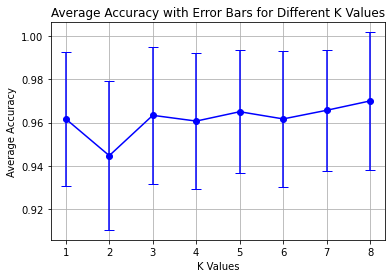

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

K_values = range(1, 9)
accuracies = np.zeros((8, 100))

average_accuracies = []
std_accuracies = []

for idx, K in enumerate(K_values):
    for i in range(100):
        (training_data, test_data, training_labels, test_labels) = train_test_split(all_vals, all_labels, test_size=0.2)
        pred_labels = knn(test_data, training_data, training_labels, K)
        accuracy = sum(test_labels == pred_labels)/len(test_labels)
        accuracies[idx, i] = accuracy


    #Calculate average accuracy and standard deviation for each K value:
    average_accuracies.append( np.mean(accuracies[idx][:]))
    std_accuracies.append(np.std(accuracies[idx][:]))


#Generate the plot showing average accuracy as a function of K with error bars for standard deviation:

plt.errorbar(K_values, average_accuracies, yerr=std_accuracies, fmt='o-', color='b', capsize=5)
plt.xlabel('K Values')
plt.ylabel('Average Accuracy')
plt.title('Average Accuracy with Error Bars for Different K Values')
plt.xticks(K_values)
plt.grid()
plt.show()

### Feature selection 

We have extensively discussed in class the fact that a good or bad set of features can make or break our model! Here we will see what happens when we operate on a subset of the features, and in particular in
- a subset that has good separability of classes
- a subset that has poor separability of classes

 

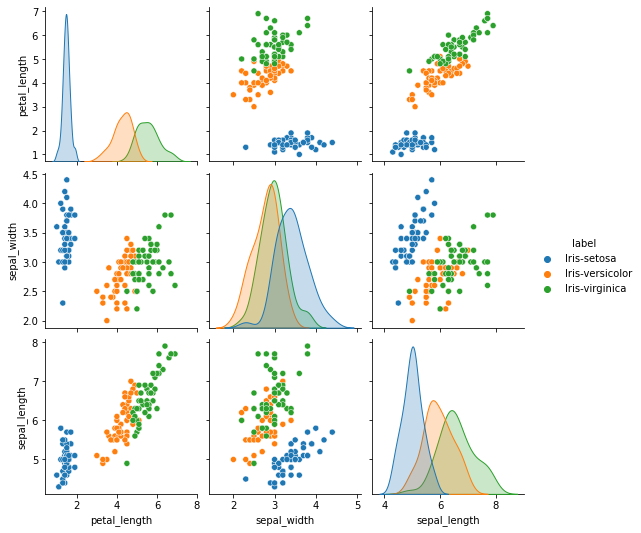

In [9]:
sb.pairplot(data[['petal_length','sepal_width','sepal_length','label']], hue = 'label')

Apply K-NN classification with K = 1 on two datasets (using the same train/test split for both datasets, and the same method you used to split as above) and measure the classification accuracy for:
- Only (petal length, sepal width) 
- Only (sepal length, sepal width) 

What do you observe regarding the classification accuracy? 

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



petal_sepal_df = data[[ 'petal_length','sepal_width']].values
petal_sepal_total_accuracy = 0

for p in range(0, 100):
    (training_data, test_data, training_labels, test_labels) = train_test_split(petal_sepal_df, all_labels, test_size=0.2,  random_state=42)
    
  
    pred_labels =  knn(test_data, training_data, training_labels, 1)
    
    accuracy = accuracy_score(test_labels, pred_labels)
    petal_sepal_total_accuracy += accuracy

petal_sepal_avacc = petal_sepal_total_accuracy / 100
print("The average accuracy for petal_length, sepal_width is ", petal_sepal_avacc)

The average accuracy for petal_length, sepal_width is  0.9000000000000008


In [ ]:


sepal_sepal_df = data[[ 'sepal_length', 'sepal_width']].values
sepal_sepal_total_accuracy = 0

for p in range(0, 100):
    (training_data, test_data, training_labels, test_labels) = train_test_split(sepal_sepal_df, all_labels, test_size=0.2, random_state=42)
    

    pred_labels =  knn(test_data, training_data, training_labels, 1)
    
    accuracy = accuracy_score(test_labels, pred_labels)
    sepal_sepal_total_accuracy += accuracy

sepal_sepal_avacc =sepal_sepal_total_accuracy / 100
print("The average accuracy for sepal_length, sepal_width is ", sepal_sepal_avacc)

The average accuracy for sepal_length, sepal_width is  0.7999999999999985


Observations:
The classifier's accuracy is lower when considering the features sepal_length and sepal_width compared to using the features petal_length and sepal_width. This discrepancy is likely due to the subset of sepal_length and sepal_width exhibiting poor separability of classes. The features sepal_length and sepal_width may be causing interference, making it challenging to accurately classify data points within that subset.

## Dimensionality Reduction with SVD for K-NN

This section explores how dimensionality reduction via 
**Singular Value Decomposition (SVD)** impacts the performance of a K-NN classifier, following concepts from *Latent Semantic Indexing/Analysis* 
### Key Concepts

- **Data Matrix ($\mathbf{X}$):** Rows are data points, columns are features.
- **SVD Decomposition:** $\mathbf{X} = \mathbf{U}\boldsymbol{\Sigma}\mathbf{V}^T$
  - $\mathbf{U}$: Left singular vectors (orthonormal)
  - $\mathbf{V}$: Right singular vectors (orthonormal)
  - $\boldsymbol{\Sigma}$: Diagonal matrix of singular values (non-negative, descending order)
- **Low-Rank Approximation:** By truncating SVD to keep only the first $r$ singular values/vectors, we obtain the best possible reconstruction of $\mathbf{X}$ with $r$ dimensions (in terms of squared error).

### Experimental Procedure

- **Truncated SVD:** Keep only the top $r$ singular values/vectors (where $r \leq 4$ since there are 4 features).
  - For $r=4$ (full rank, no reduction), SVD gives exact reconstruction (if features aren't linearly dependent).
  - For $r<4$, SVD yields a lower-dimensional approximation.
- **K-NN Performance Evaluation:**
  1. For each $r=1,2,3,4$, approximate the data using truncated SVD.
  2. Train and test a K-NN classifier (for $k=1$ to $4$).
  3. Repeat for 100 random 80/20 train/test splits.
  4. Plot accuracy vs. $r$ with error bars showing variability across splits.

### Expected Outcome

- The plot will illustrate how reducing dimensionality (via SVD truncation) affects K-NN classification accuracy.
- Error bars provide insight into the stability/reliability of accuracy estimates for each rank $r$.

**Summary:**  
This experiment demonstrates the trade-off between dimensionality reduction and classification performance. Truncated SVD offers an optimal way to reduce feature space, and the results help visualize how much information is lost (or retained) by reducing the number of dimensions, as measured by K-NN accuracy.


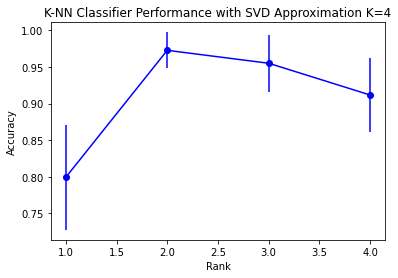

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

# Function to perform SVD on the training data
def perform_svd(data, rank):
    U, S, V = np.linalg.svd(data, full_matrices=False)
    truncated_U = U[:, :rank]
    truncated_S = np.diag(S[:rank])
    truncated_V = V[:rank, :]
    return truncated_U, truncated_S, truncated_V

# Initialize variables
ranks = np.arange(1, 5)
K = np.arange(1, 5)
iterations = 100
accuracies = np.zeros((len(ranks), iterations))

# Loop over different ranks

for idx, rank in enumerate(ranks):
    for i in range(iterations):
        # Split data into training and testing sets
        X_train, X_test, y_train, y_test = train_test_split(all_vals, all_labels, test_size=0.2)

        # Perform SVD on the training data
        truncated_U, truncated_S, truncated_V = perform_svd(X_train, rank)

        projected_X_train=  truncated_U
        projected_X_test = np.dot(np.dot(X_test, truncated_V.T),np.linalg.inv(truncated_S))


        # Initialize and train the K-NN classifier

        knn = KNeighborsClassifier(n_neighbors=4)
        knn.fit(projected_X_train, y_train)

        #Evaluate the K-NN classifier on the test set
        accuracy = knn.score(projected_X_test, y_test)
        accuracies[idx, i] = accuracy


    # Calculate mean accuracy and standard deviation for each rank
    mean_accuracies = np.mean(accuracies, axis=1)
    std_accuracies = np.std(accuracies, axis=1)

# Plot accuracy vs. rank with error bars
plt.errorbar(ranks, mean_accuracies, yerr=std_accuracies, fmt='-o', color='b')
plt.xlabel('Rank')
plt.ylabel('Accuracy')
plt.title('K-NN Classifier Performance with SVD Approximation K=4')
plt.show()